# ESG Score Prediction

## Notebook Outline :

1. Introduction (ESG Score, Calculation method, Factors - Summary based on the TR pdf)
2. Data Explanation (Features - what they are)
3. Data Processing - Outlier Detection, Feature Transformation 
4. EDA - Basic Insights
6. Feature Selection/Importance
5. Data Modelling

TODO :
1. Figure out Return and MC data values 
2. P/E Daily time series ration - what does this column mean? - Karthik
3. Read about KNN Imputation 
4. Null values and outlier 

'Total Current Assets', 'Total Current Liabilities', 'Total Debt', 'Total Assets, Reported' - Dev

'P/E (Daily Time Series Ratio)','CO2 Emissions','Total Revenue', 'Total Equity' - Karthik

 'Net Income - Actual','Revenue Per Share','Company Market Capitalization', 'PPE Total', - Sush

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_firm = pd.read_csv("Firm_Data.csv")

In [24]:
df_firm.head(20)

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
0,BVIC.L,31/12/2009,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905
1,BVIC.L,31/12/2010,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900
2,BVIC.L,31/12/2011,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436
3,BVIC.L,31/12/2012,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571
4,BVIC.L,31/12/2013,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399
5,BVIC.L,31/12/2014,828.662865,705.524961,916.711341,1790.210699,157.742654,8.824210,2183.992072,134.996832,27.779129,56.486561,51.956458,53.173608,66.189318,2600.057241,923.534285,18.651145
6,BVIC.L,31/12/2015,958.070197,697.413165,877.611125,1972.158125,174.101133,7.841383,1973.676221,321.532669,30.711131,71.533697,70.562749,61.699281,81.216931,2810.455180,901.445227,17.698577
7,BVIC.L,31/12/2016,937.577039,1011.275318,1014.648830,2120.642005,161.302423,7.055922,1857.118761,364.598876,37.880026,54.877377,45.421212,66.527985,59.659234,1839.323904,1153.222353,13.027894
8,BVIC.L,31/12/2017,766.252729,827.606532,900.748838,2160.779113,186.478624,7.250479,1916.301625,454.527187,35.135417,68.473164,70.109455,56.919381,75.593852,2906.107284,1256.815229,19.312796
9,BVIC.L,31/12/2018,848.120066,910.393705,1001.980250,2293.441726,189.832937,7.380873,1958.883765,491.544855,31.206958,63.609177,66.475517,40.414673,78.545530,2701.676442,1314.911801,18.140770


In [ ]:
df_firm.shape

In [ ]:
df_firm.columns

In [17]:
# Lets rename some columns
df_firm.rename(columns={"Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions", "Property Plant And Equipment, Total - Gross": "PPE Total"},inplace=True)

In [ ]:
df_ID = pd.read_csv("ID_Data.csv")
df_ID.head()

In [ ]:
df_return = pd.read_csv("Return_Data.csv")
df_return.head(20)

### Data Exploration

In [15]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   RIC                                                        24479 non-null  object 
 1   Date                                                       24479 non-null  object 
 2   Total Current Assets                                       22689 non-null  float64
 3   Total Current Liabilities                                  22681 non-null  float64
 4   Total Debt                                                 23628 non-null  float64
 5   Total Assets, Reported                                     23663 non-null  float64
 6   Net Income - Actual                                        21343 non-null  float64
 7   Revenue Per Share                                          23617 non-null  float64
 8   Total 

#### Share of Null Values in the data

In [16]:
df_firm.isnull().sum()/len(df_firm) *100

RIC                                                           0.000000
Date                                                          0.000000
Total Current Assets                                          7.312390
Total Current Liabilities                                     7.345071
Total Debt                                                    3.476449
Total Assets, Reported                                        3.333470
Net Income - Actual                                          12.810981
Revenue Per Share                                             3.521386
Total Revenue                                                 3.108787
Total Equity                                                  3.427428
Total CO2 Equivalent Emissions To Revenues USD in million    41.141386
ESG Score                                                    27.439846
Social Pillar Score                                          27.443932
Governance Pillar Score                                      27.439846
Enviro

#### Outliers 

In [18]:
df_firm.describe([0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99])

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,22689.000000,22681.000000,23628.000000,23663.000000,21343.000000,23617.000000,23718.000000,23640.000000,14408.000000,17762.000000,17761.000000,17762.000000,17761.000000,2.263900e+04,22116.000000,19110.000000
mean,4692.829418,3723.691291,4483.228909,15086.476701,879.905168,105.508067,10246.240602,5148.146175,385.527429,55.700185,57.786323,55.827876,52.231873,2.142561e+04,8703.691339,39.547117
std,13508.717536,10296.088849,13373.143702,37604.863640,2715.017134,2747.808830,27863.720433,13830.073805,1362.586319,18.854484,22.045962,21.617581,25.520278,2.468674e+05,27570.799105,236.995909
min,0.008869,0.000415,0.000000,0.008869,-9703.255825,-33.626790,-188.078000,-85560.000000,0.000000,1.019613,0.263458,0.249062,0.000000,4.115218e-01,0.000000,0.124464
10%,134.468447,87.445042,23.882996,432.845198,8.700617,1.890277,261.294152,133.523973,5.699868,29.004454,26.558481,25.509863,14.708211,4.156814e+02,73.584000,8.519075
20%,283.336908,185.185185,127.873195,947.510106,36.086495,4.333428,568.553446,316.311897,11.665289,38.284824,36.703625,34.998173,28.427191,8.122769e+02,241.403054,11.633397
40%,769.485162,509.801821,574.200822,2486.306053,112.162954,11.604785,1594.758919,881.293103,29.907056,51.554523,52.433124,50.458138,46.820513,2.156526e+03,890.222000,16.739378
50%,1177.409528,815.154946,977.564496,3807.254064,179.474856,16.741294,2457.730056,1347.365468,43.776762,57.218624,59.358661,57.483966,54.598596,3.370318e+03,1493.990867,19.398117
60%,1814.817905,1298.030311,1585.258199,5815.820000,288.314600,23.286913,3758.075856,1984.703400,67.426194,62.522106,66.089862,64.115638,62.156877,5.338459e+03,2436.893204,22.370497
70%,2804.800000,2058.045000,2635.300226,9148.030260,473.878698,33.678130,5998.991400,3081.213993,131.580512,67.870036,72.617984,70.391390,69.588923,8.697905e+03,4221.693560,26.429144


In [ ]:
df_firm['Total Current Assets'].quantile(0.8)

In [ ]:
df_firm['Total Current Assets'].clip(upper=5000,inplace=True)

In [10]:
for i in columns :
    df_firm[i].clip(upper=df_firm[i].quantile(0.8),inplace=True)

#### Visualising the distribution 

In [21]:
columns = ['Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity', 'CO2 Emissions',
       #'ESG Score', #'Social Pillar Score', 'Governance Pillar Score','Environmental Pillar Score',
        'Company Market Capitalization',
       'PPE Total', 'P/E (Daily Time Series Ratio)']

In [22]:
len(columns)

12

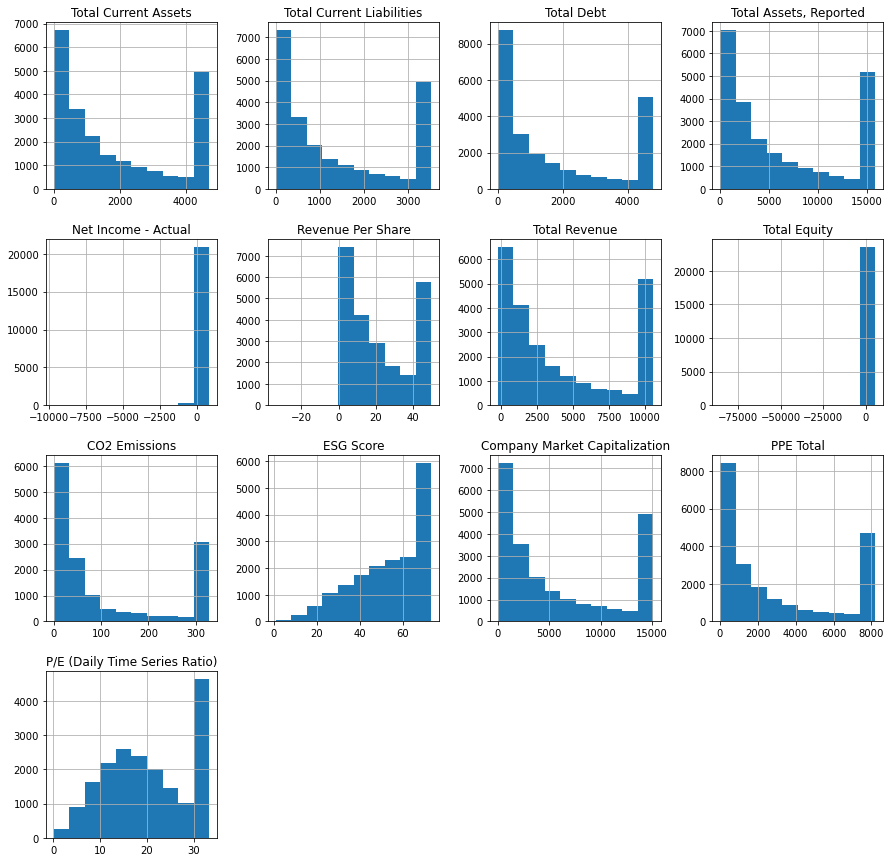

In [12]:
df_firm[columns].hist( figsize=(15,15))

plt.show()

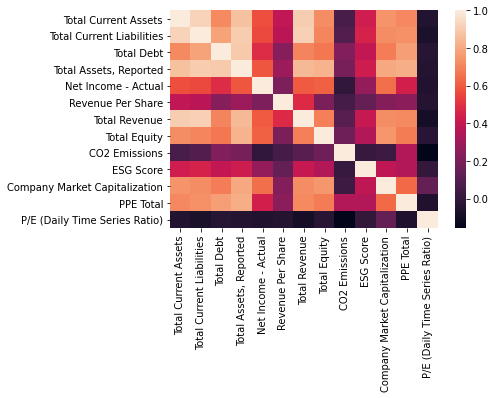

<Figure size 1440x1440 with 0 Axes>

In [13]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat)
plt.figure(figsize=(20,20))
plt.show()